In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper

In [2]:
#Call function to get BTC historical data for ETH
scraper = CmcScraper('ETH')

In [3]:
#Get dataframe
df = scraper.get_dataframe()

In [4]:
#Make date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

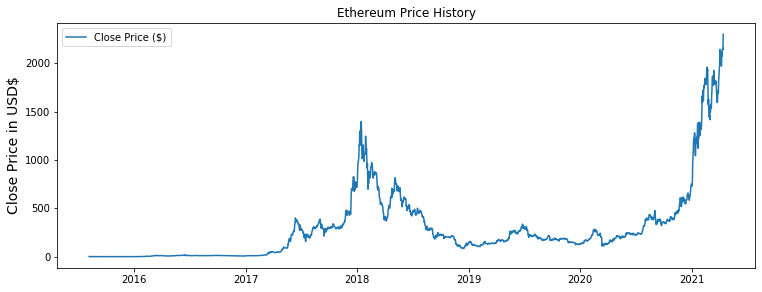

In [6]:
#Visually Show Price
plt.subplots(figsize=(12.5,4.5))
plt.plot(df.index, df['Close'], label='Close Price ($)')
plt.title('Ethereum Price History')
plt.ylabel('Close Price in USD$', fontsize=14)
plt.legend()
plt.show()

## RSI (Relative Strength Index)

In [7]:
#Get difference of prices from prev day
delta = df['Close'].diff(1)

#Remove NaN
delta = delta.dropna()

#Get ups and downs
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

#Setting time period of 14 for RSI
period = 14

#Average gains and losees
avg_gains = up.rolling(window=period).mean()
avg_losses = abs(down.rolling(window=period).mean())

#Calculate RS
rs = avg_gains / avg_losses

#Calculate RSI
rsi = 100.0 - (100.0 / (1.0 + rs))

In [8]:
new_df = pd.DataFrame()
new_df['Close Price'] = df['Close']
new_df['RSI'] = rsi

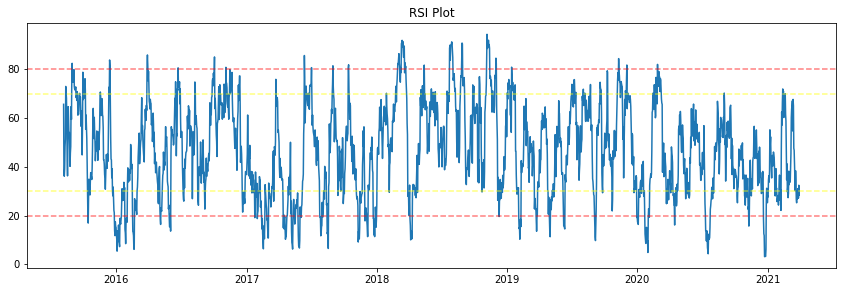

In [9]:
#Visualize RSI
plt.figure(figsize=(14.5, 4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(20, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='yellow')
plt.axhline(70, linestyle='--', alpha=0.5, color='yellow')
plt.axhline(80, linestyle='--', alpha=0.5, color='red')
plt.show()

In [10]:
#Generate trade signals based on RSI
flag = -1
buying_signals = []
selling_signals = []
for i in range(len(new_df)):
    if new_df['RSI'][i] <= 25:
        if flag != 1:
            buying_signals.append(new_df['Close Price'][i])
            selling_signals.append(np.nan)
            flag = 1
        else:
            buying_signals.append(np.nan)
            selling_signals.append(np.nan)
    elif new_df['RSI'][i] >= 65:
        if flag == 1:
            buying_signals.append(np.nan)
            selling_signals.append(new_df['Close Price'][i])
            flag = 0
        else:
            buying_signals.append(np.nan)
            selling_signals.append(np.nan)
    else:
        buying_signals.append(np.nan)
        selling_signals.append(np.nan)

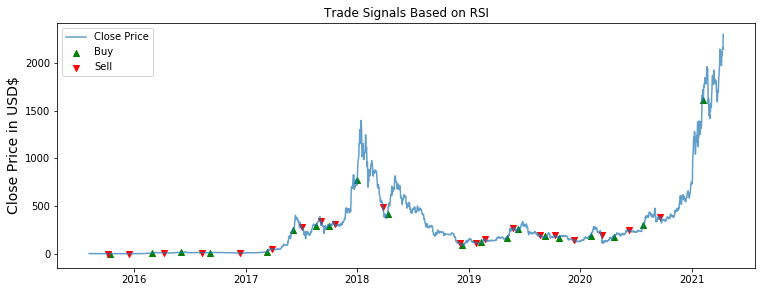

In [12]:
#Visualize Trade Signals
plt.figure(figsize=(12.5, 4.5))
plt.title('Trade Signals Based on RSI')
plt.plot(new_df['Close Price'], label='Close Price', alpha=0.7)
plt.scatter(new_df.index, buying_signals, marker='^', color='green', label='Buy')
plt.scatter(new_df.index, selling_signals, marker='v', color='red', label='Sell')
plt.ylabel('Close Price in USD$', fontsize=14)
plt.legend()
plt.show()

## MACD (Moving Average Convergence Divergence)

In [13]:
#Calculate short term exponential moving average / ema
short_ema = df['Close'].ewm(span=12, adjust=False).mean()

#Calculate short term exponential moving average / ema
long_ema = df['Close'].ewm(span=26, adjust=False).mean()

#MACD line
macd = short_ema - long_ema

#Signal line
signal = macd.ewm(span=9, adjust=False).mean()

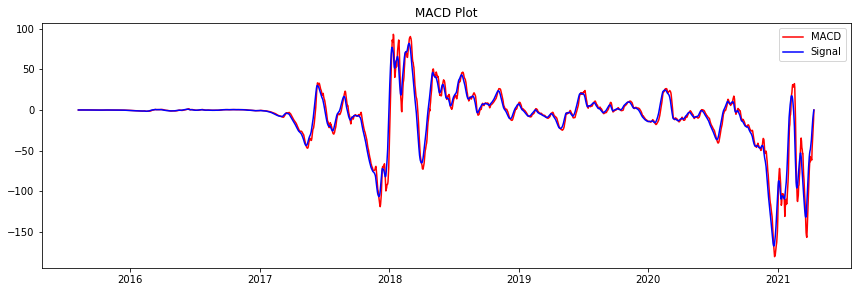

In [15]:
#Visualize MACD
plt.figure(figsize=(14.5, 4.5))
plt.title('MACD Plot')
plt.plot(df.index, macd, label='MACD', color='red')
plt.plot(df.index, signal, label='Signal', color='blue')
plt.legend()
plt.show()

In [16]:
new_df = pd.DataFrame()
new_df['MACD'] = macd
new_df['Signal'] = signal
new_df['Close'] = df['Close']

In [17]:
#Generate trade signals based on MACD
flag = -1
buying_signals = []
selling_signals = []
for i in range(len(new_df)):
    if new_df['MACD'][i] > new_df['Signal'][i]:
        selling_signals.append(np.nan)
        if flag != 1:
            buying_signals.append(new_df['Close'][i])
            flag = 1
        else:
            buying_signals.append(np.nan)
    elif new_df['MACD'][i] < new_df['Signal'][i]:
        buying_signals.append(np.nan)
        if flag == 1:
            selling_signals.append(new_df['Close'][i])
            flag = 0
        else:
            selling_signals.append(np.nan)
    else:
        buying_signals.append(np.nan)
        selling_signals.append(np.nan)

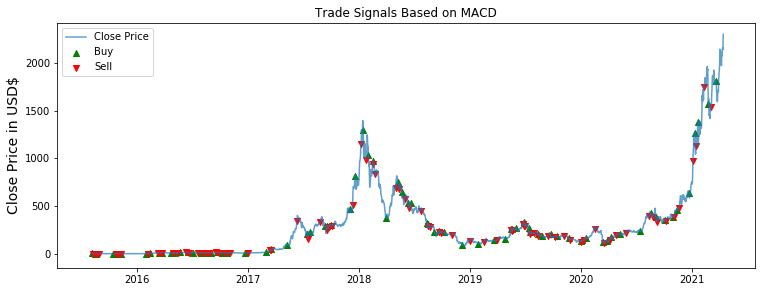

In [18]:
#Visualize Trade Signals
plt.figure(figsize=(12.5, 4.5))
plt.title('Trade Signals Based on MACD')
plt.plot(new_df['Close'], label='Close Price', alpha=0.7)
plt.scatter(new_df.index, buying_signals, marker='^', color='green', label='Buy')
plt.scatter(new_df.index, selling_signals, marker='v', color='red', label='Sell')
plt.ylabel('Close Price in USD$', fontsize=14)
plt.legend()
plt.show()

## 4EMA (4 Moving Averages Crossover)

In [19]:
#Calculate four moving averages
length_1 = df['Close'].ewm(span=9, adjust=False).mean()
length_2 = df['Close'].ewm(span=13, adjust=False).mean()
length_3 = df['Close'].ewm(span=21, adjust=False).mean()
length_4 = df['Close'].ewm(span=55, adjust=False).mean()

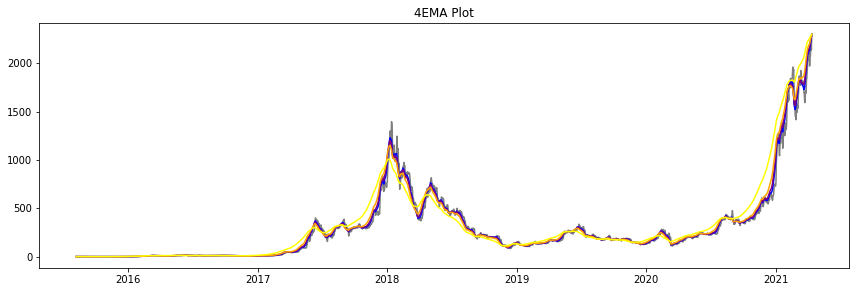

In [20]:
#Visualize 4EMA
plt.figure(figsize=(14.5, 4.5))
plt.title('4EMA Plot')
plt.plot(df['Close'], color='black', alpha=0.5)
plt.plot(length_1, color='blue')
plt.plot(length_2, color='purple')
plt.plot(length_3, color='orange')
plt.plot(length_4, color='yellow')
plt.show()

In [21]:
new_df = pd.DataFrame()
new_df['Close'] = df['Close']

In [22]:
#Generate trade signals based on 4EMA
flag = -1
buying_signals = []
selling_signals = []
for i in range(len(length_1)):
    if length_1[i] < length_2[i] and length_2[i] < length_3[i] and length_3[i] < length_4[i]:
        if flag != 1:
            flag = 1
            buying_signals.append(df['Close'][i])
            selling_signals.append(np.nan)
        else:
            buying_signals.append(np.nan)
            selling_signals.append(np.nan)
    elif length_1[i] > length_2[i] and length_2[i] > length_3[i] and length_3[i] > length_4[i]:
        if flag == 1:
            flag = 0
            selling_signals.append(df['Close'][i])
            buying_signals.append(np.nan)
        else:
            buying_signals.append(np.nan)
            selling_signals.append(np.nan)
    else:
        buying_signals.append(np.nan)
        selling_signals.append(np.nan)

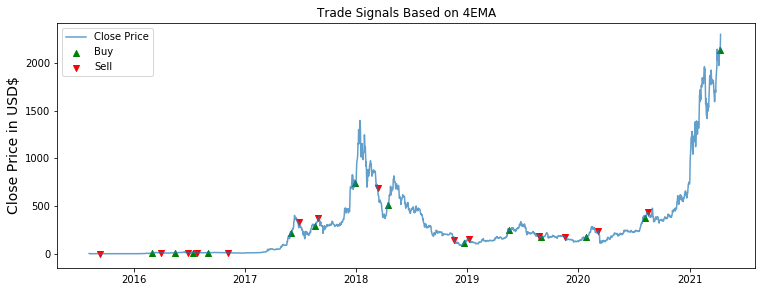

In [24]:
#Visualize Trade Signals
plt.figure(figsize=(12.5, 4.5))
plt.title('Trade Signals Based on 4EMA')
plt.plot(new_df['Close'], label='Close Price', alpha=0.7)
plt.scatter(new_df.index, buying_signals, marker='^', color='green', label='Buy')
plt.scatter(new_df.index, selling_signals, marker='v', color='red', label='Sell')
plt.ylabel('Close Price in USD$', fontsize=14)
plt.legend()
plt.show()